In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# we will import housing datasets
df = pd.read_csv('Housing.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [6]:
df.shape

(546, 13)

In [12]:
#we will only use price and lotsize columns
df = df[['price', 'lotsize']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f44810a20>,
      dtype=object)

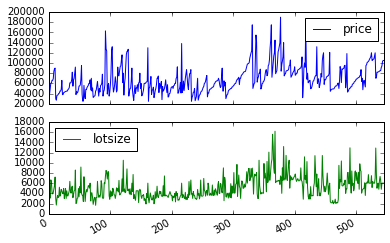

In [13]:
# let's plot these fuckers
%matplotlib inline
df.plot(subplots=True)

In [193]:
# we can see that there is relation in lotsize and price
# there is no big trend and seasonality as such
# so let's directly fit random forest
X = df['lotsize']
y = df['price']

x_train = X[X.index < 400]
x_test = X[X.index >= 400]
y_train = y[y.index < 400]
y_test = y[y.index >= 400]

In [118]:
#let's import random forest model
from sklearn.ensemble.forest import RandomForestRegressor

In [187]:
#build the model
model = RandomForestRegressor(n_estimators=15, max_features=1,oob_score=True)

In [208]:
x_train[:, None].shape

(400, 1)

In [188]:
model.fit(x_train[:, None], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [190]:
model.score(x_test[:, None], y_test)

-0.04417508846133322

In [191]:
y_pred = model.predict(x_train[:, None])

In [194]:
y_train = y_train.values
y_test = y_test.values

In [195]:
df_pred = pd.DataFrame(list(zip(y_train, y_pred)), columns=['price', 'predicted_price']) 

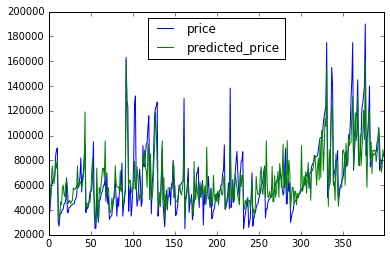

In [196]:
df_pred.plot()

In [197]:
# It looks pretty decent. Let's check r2 score and mse
from sklearn.metrics import r2_score, mean_squared_error

In [198]:
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

In [199]:
print("re score is:", r2)

re score is: 0.6857833453778328


In [200]:
#score is decent on traing data. what about testing data?
y_pred = model.predict(x_test[:, None])

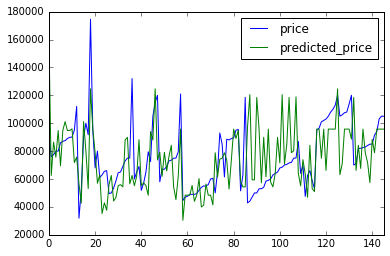

In [201]:
df_pred = pd.DataFrame(list(zip(y_test, y_pred)), columns=['price', 'predicted_price']) 
df_pred.plot()

In [202]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("r2 score is:", r2)

r2 score is: -0.04417508846133322


In [138]:
#performance is worst on test data
# we will improve it in future

0       5850
1       4000
2       3060
3       6650
4       6360
5       4160
6       3880
7       4160
8       4800
9       5500
10      7200
11      3000
12      1700
13      2880
14      3600
15      3185
16      3300
17      5200
18      3450
19      3986
20      4785
21      4510
22      4000
23      3934
24      4960
25      3000
26      3800
27      4960
28      3000
29      4500
       ...  
370     6360
371     6420
372     6360
373     6540
374     6420
375     6550
376     5750
377     7420
378     7160
379     4000
380     9000
381     6550
382    13200
383     7085
384     6600
385     6900
386    11460
387     7020
388     6540
389     8000
390     9620
391    10500
392     5020
393     7440
394     6600
395     7200
396     6710
397     6660
398     7000
399     7231
Name: lotsize, Length: 400, dtype: int64